In [2]:
pip install osmnx

     |████████████████████████████████| 92 kB 1.6 MB/s eta 0:00:01
     |████████████████████████████████| 7.3 MB 404 kB/s eta 0:00:01
     |████████████████████████████████| 2.0 MB 11.7 MB/s eta 0:00:01
     |████████████████████████████████| 1.1 MB 16.6 MB/s eta 0:00:01
     |████████████████████████████████| 8.0 MB 7.8 MB/s eta 0:00:01
     |████████████████████████████████| 62 kB 3.1 MB/s eta 0:00:011
     |████████████████████████████████| 814 kB 234 kB/s eta 0:00:01
     |████████████████████████████████| 18.1 MB 287 kB/s eta 0:00:01
     |████████████████████████████████| 1.2 MB 27.5 MB/s eta 0:00:01
     |████████████████████████████████| 12.1 MB 580 kB/s eta 0:00:01
     |████████████████████████████████| 26.5 MB 5.6 MB/s eta 0:00:01
     |████████████████████████████████| 240 kB 10.4 MB/s eta 0:00:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.20.3
    Uninstalling numpy-1.20.3:
      Successfully uninstalled numpy-1.20.3
  Attempting uninstall: pan

In [5]:
import pandas as pd
import osmnx as ox
import matplotlib.pyplot as plt
%matplotlib inline

# Load Data Files

In [22]:
json_file = open("../data/porto_boundary.geojson")
graphml_file = '../data/porto.graphml'

train_data = pd.read_csv('../data/train-1000.csv')
fmm_result = pd.read_csv('../result/task3/fmm_result.csv')

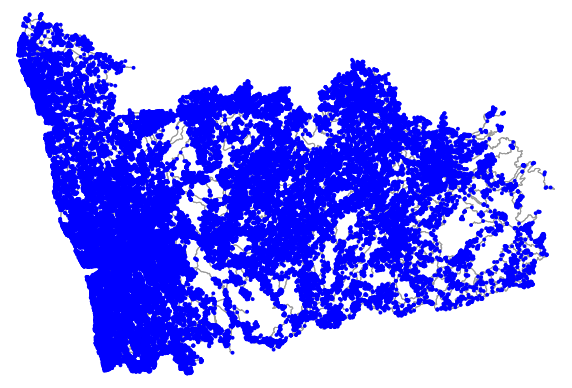

(<Figure size 720x720 with 1 Axes>, <AxesSubplot: >)

In [8]:
network_graph = ox.io.load_graphml(graphml_file)
ox.plot_graph(network_graph, figsize=(10, 10), bgcolor='#ffffff', node_color='b')

# Route Visualization
Visualize the routes that are mapped from the trajectories of the first 10 trips on the road network.
(together with different colors or separately)!

In [53]:
def vis_single_route(trip_number, color, network_graph, save_path=None, show=True):
    fig, ax = ox.plot_graph(network_graph, node_size=3, figsize=(40, 40), edge_linewidth=1, show=False)

    mgeom = [[float(j) for j in i.split(' ')] for i in fmm_result['mgeom'][trip_number][11:-1].split(',')]
    x, y = zip (*mgeom)
    ax.plot(x, y, c=color, linewidth=12)
    ax.scatter(x, y, c=color, marker='o',s=15)
    x_gap, y_gap = (max(x) - min(x))/2, (max(y) - min(y))/2
    x_mid, y_mid = (max(x) + min(x))/2, (max(y) + min(y))/2
    ax.set_xlim(x_mid - x_gap*1.2, x_mid + x_gap*1.2)
    ax.set_ylim(y_mid - y_gap*1.2, y_mid + y_gap*1.2)

    if show:
        plt.show()

    if save_path:
        fig.savefig(save_path)
        print(f'Route Visualization of Trip {trip_number+1} is completed.')

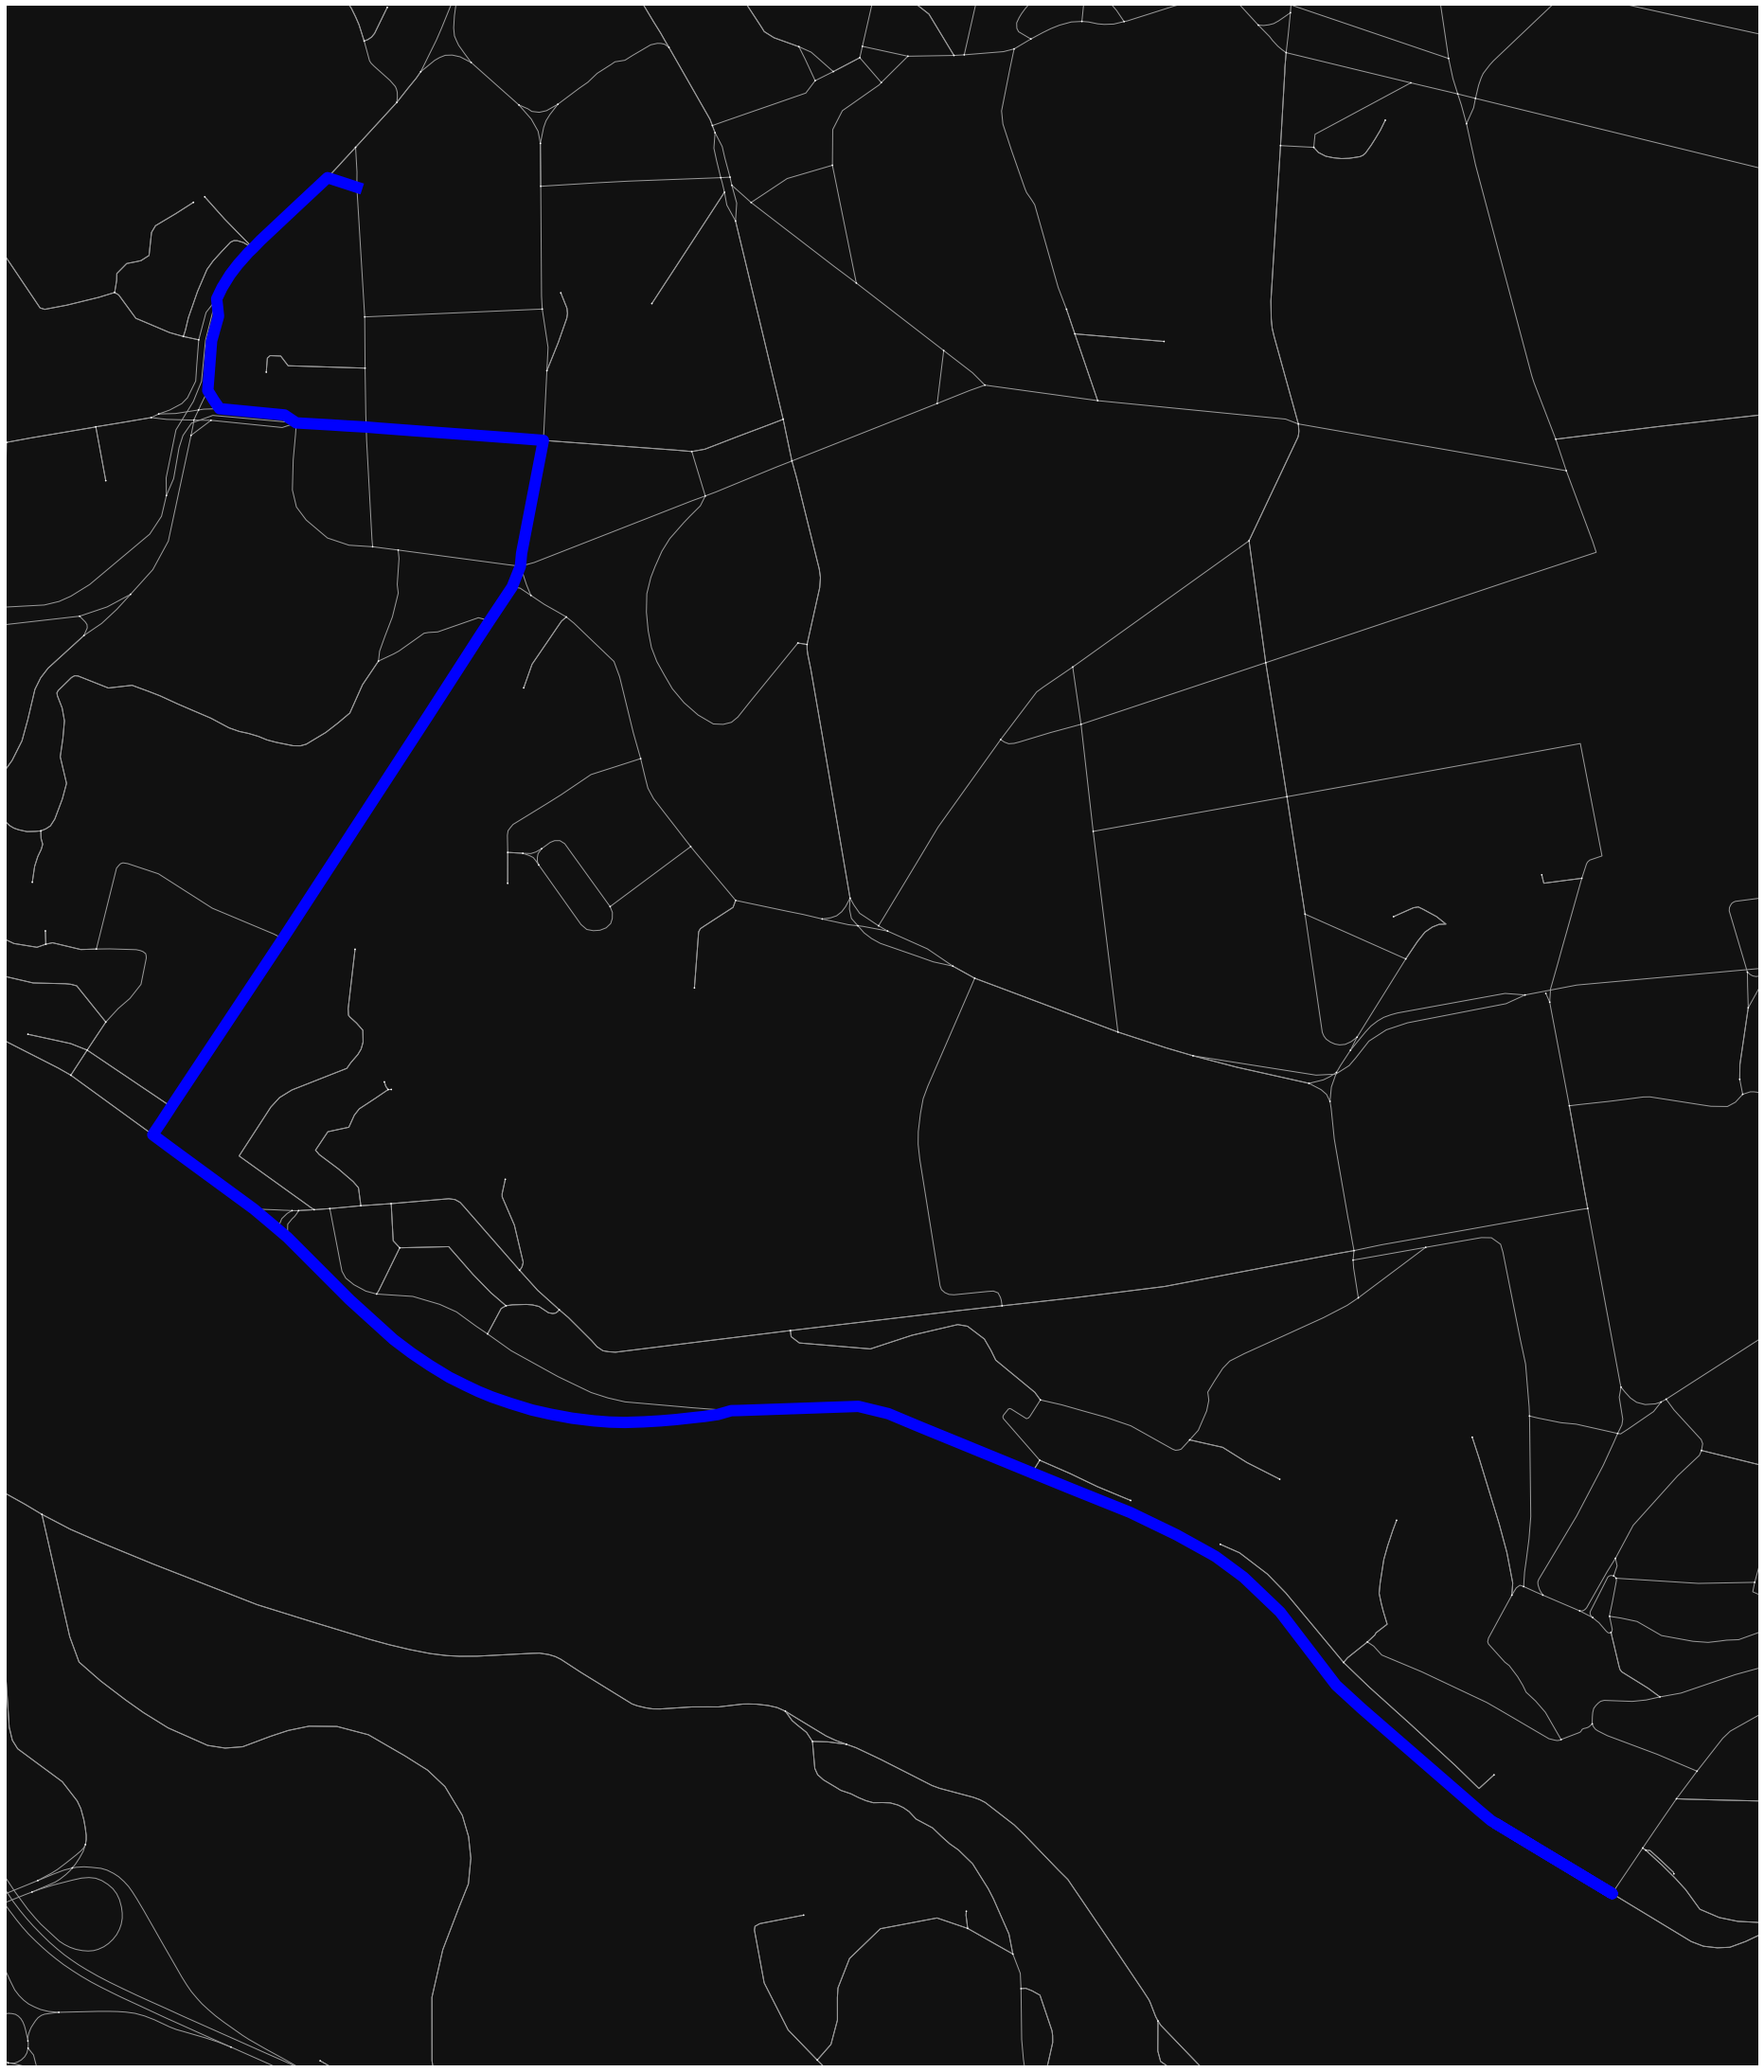

Route Visualization of Trip 1 is completed.


In [54]:
save_path = '../result/task4/Route1.png'
vis_single_route(0,'blue',network_graph,save_path=save_path)

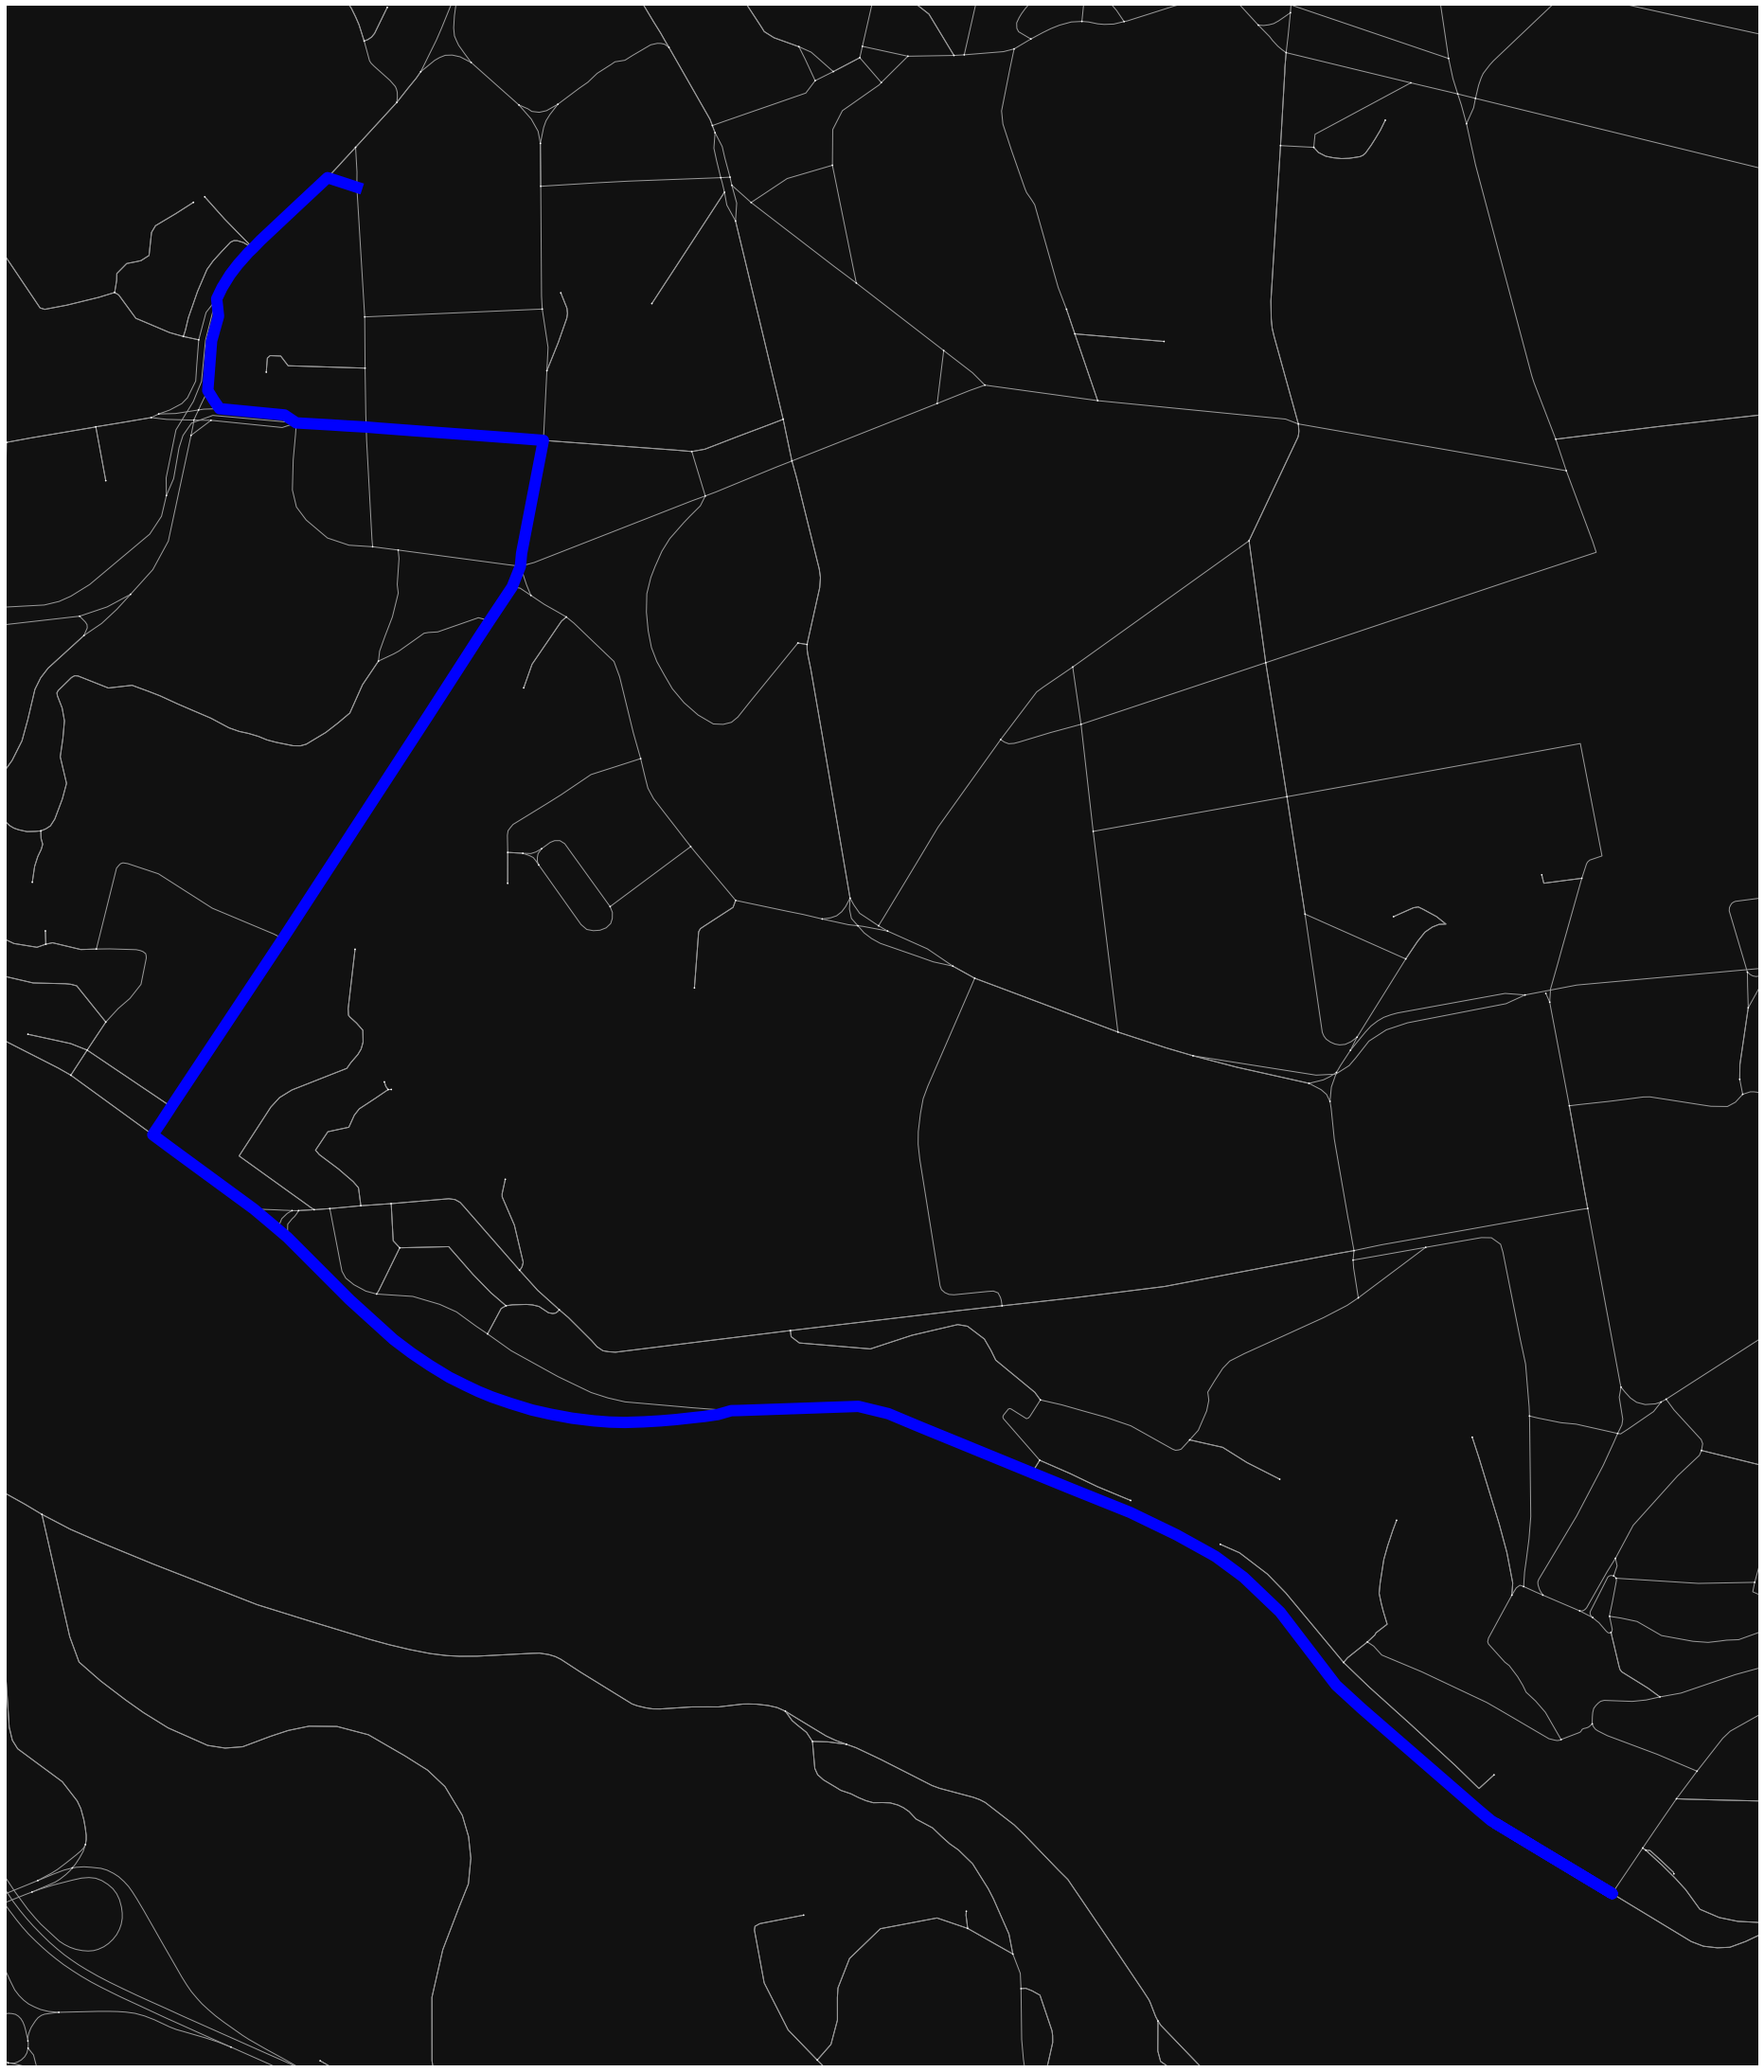

Route Visualization of Trip 1 is completed.


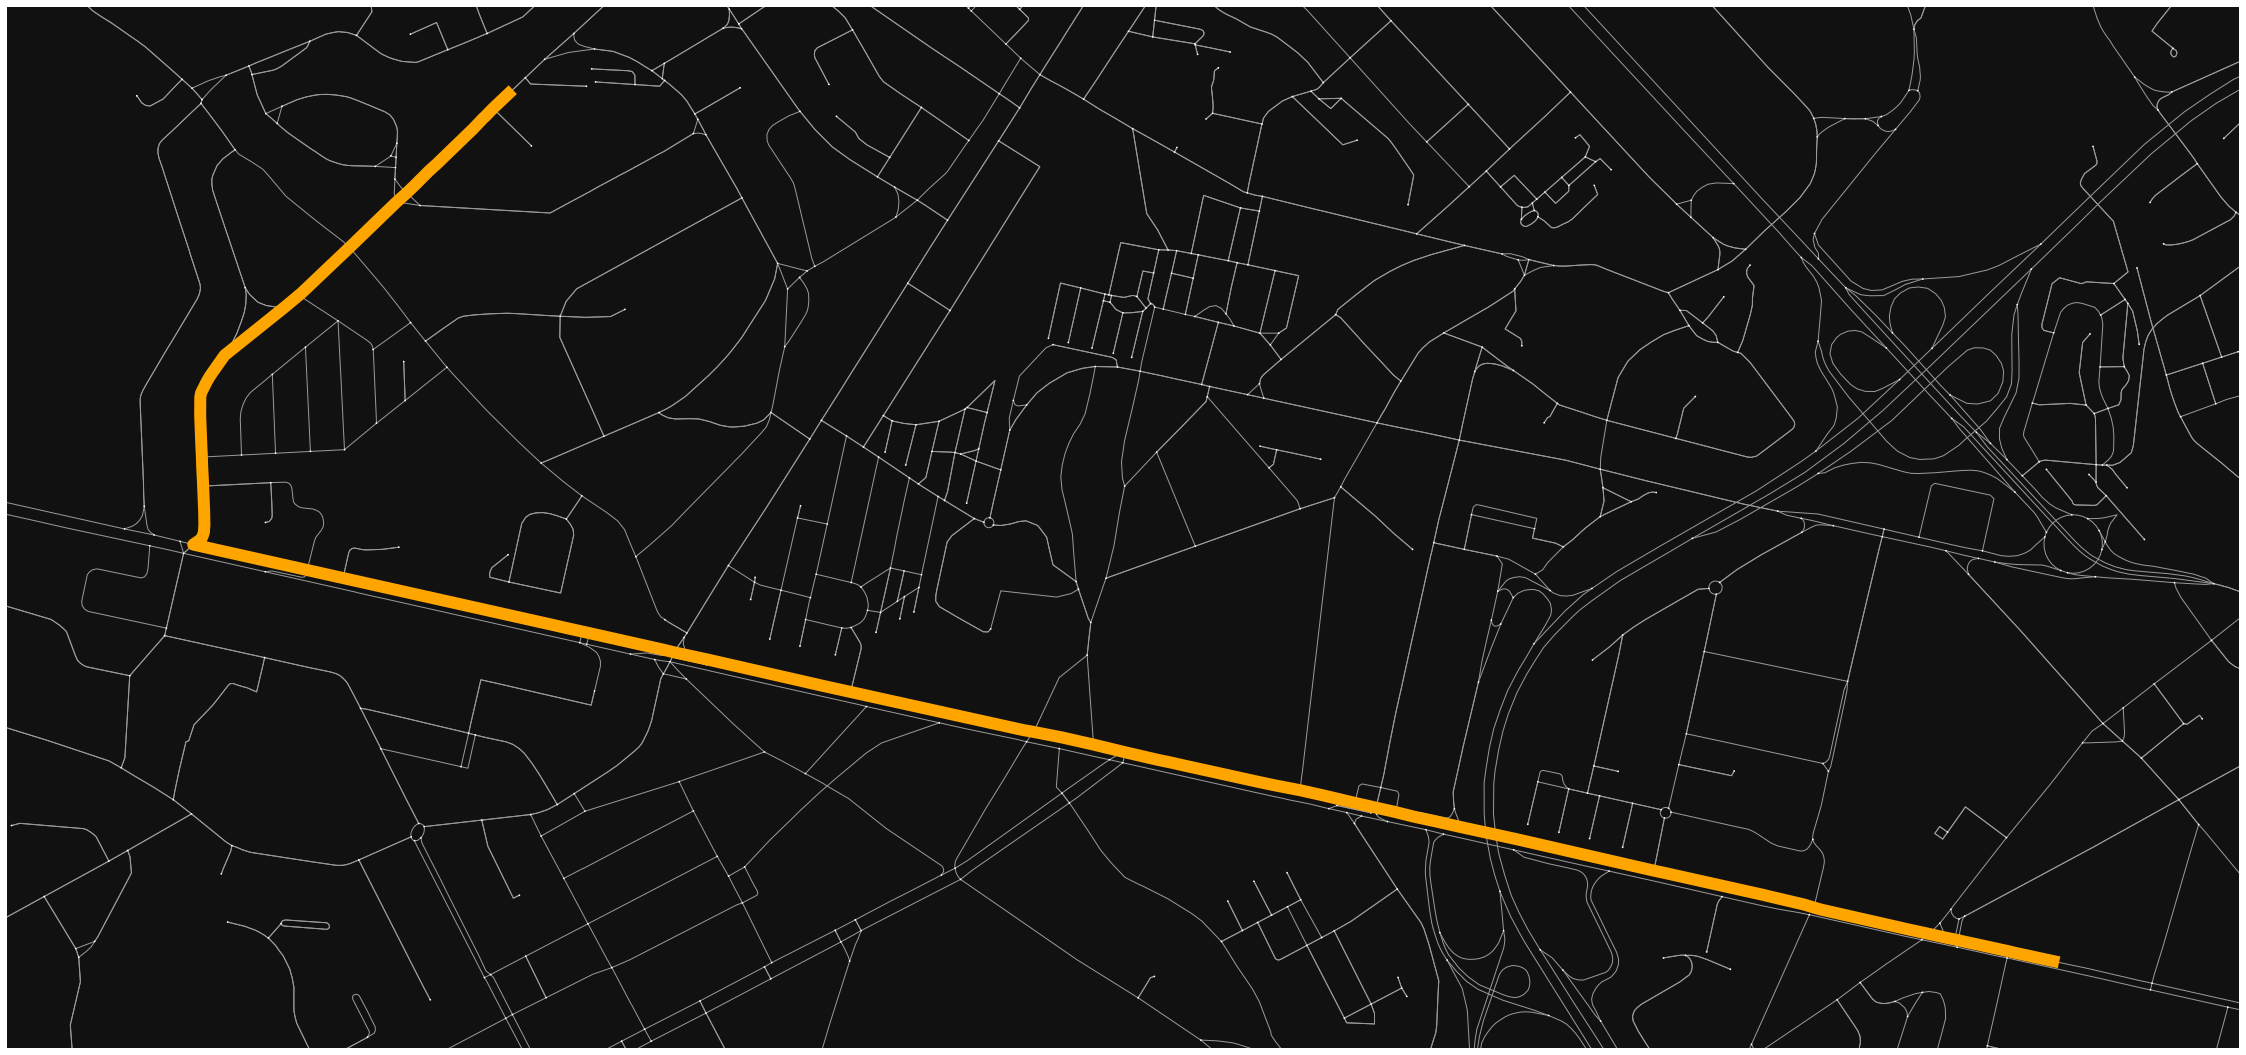

Route Visualization of Trip 2 is completed.


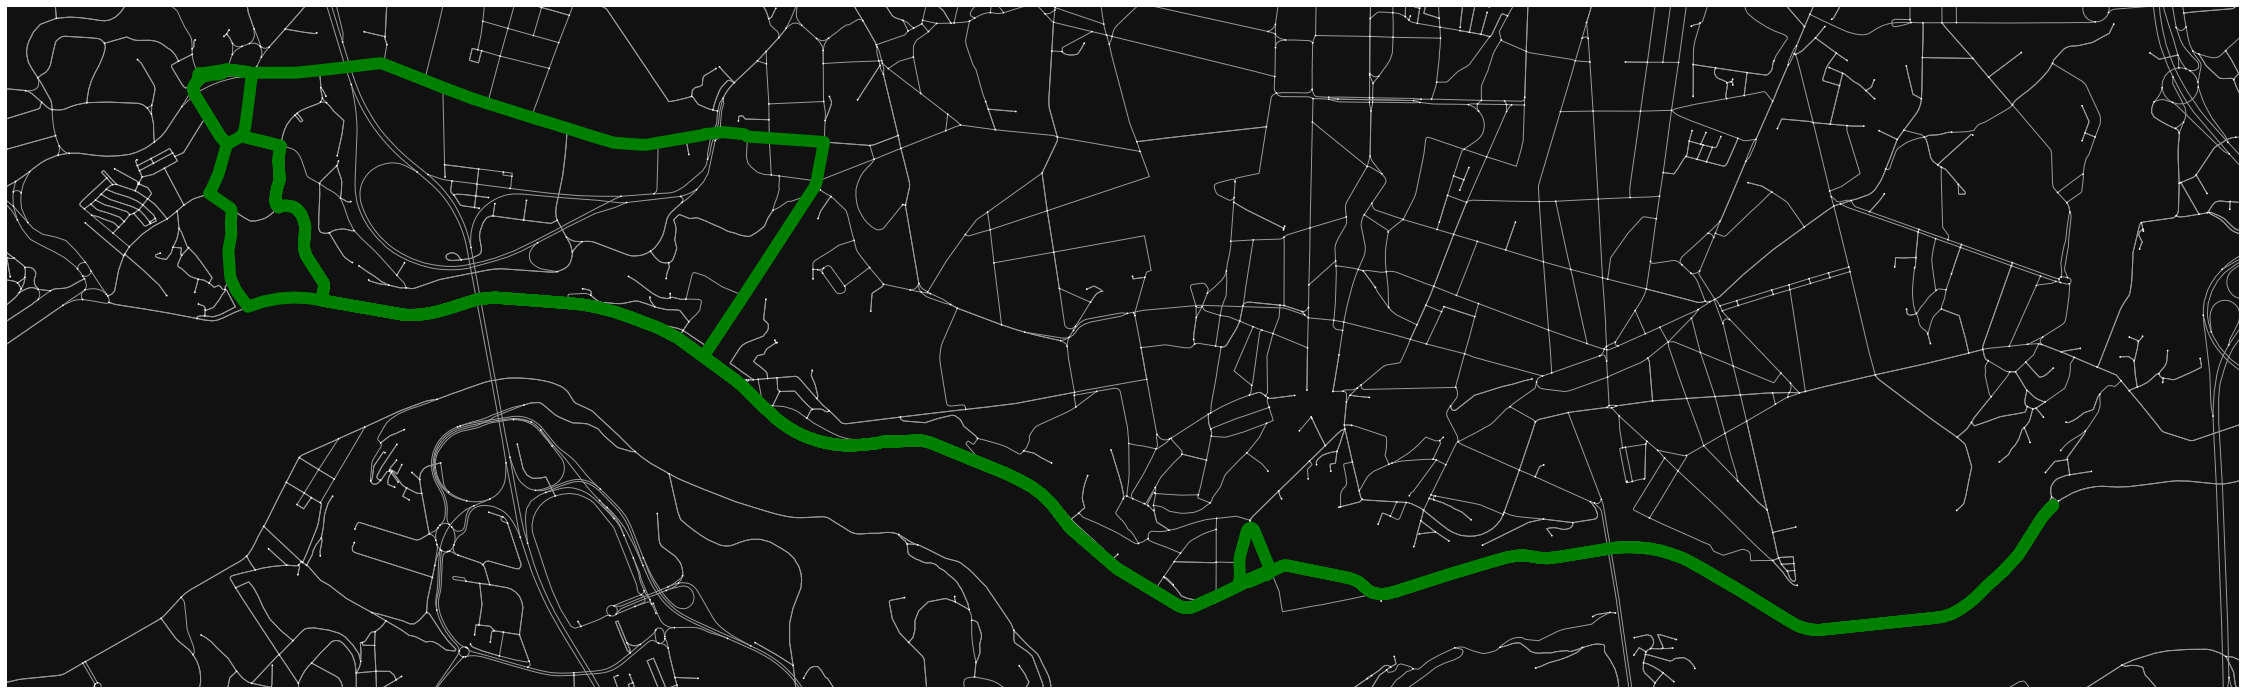

Route Visualization of Trip 3 is completed.


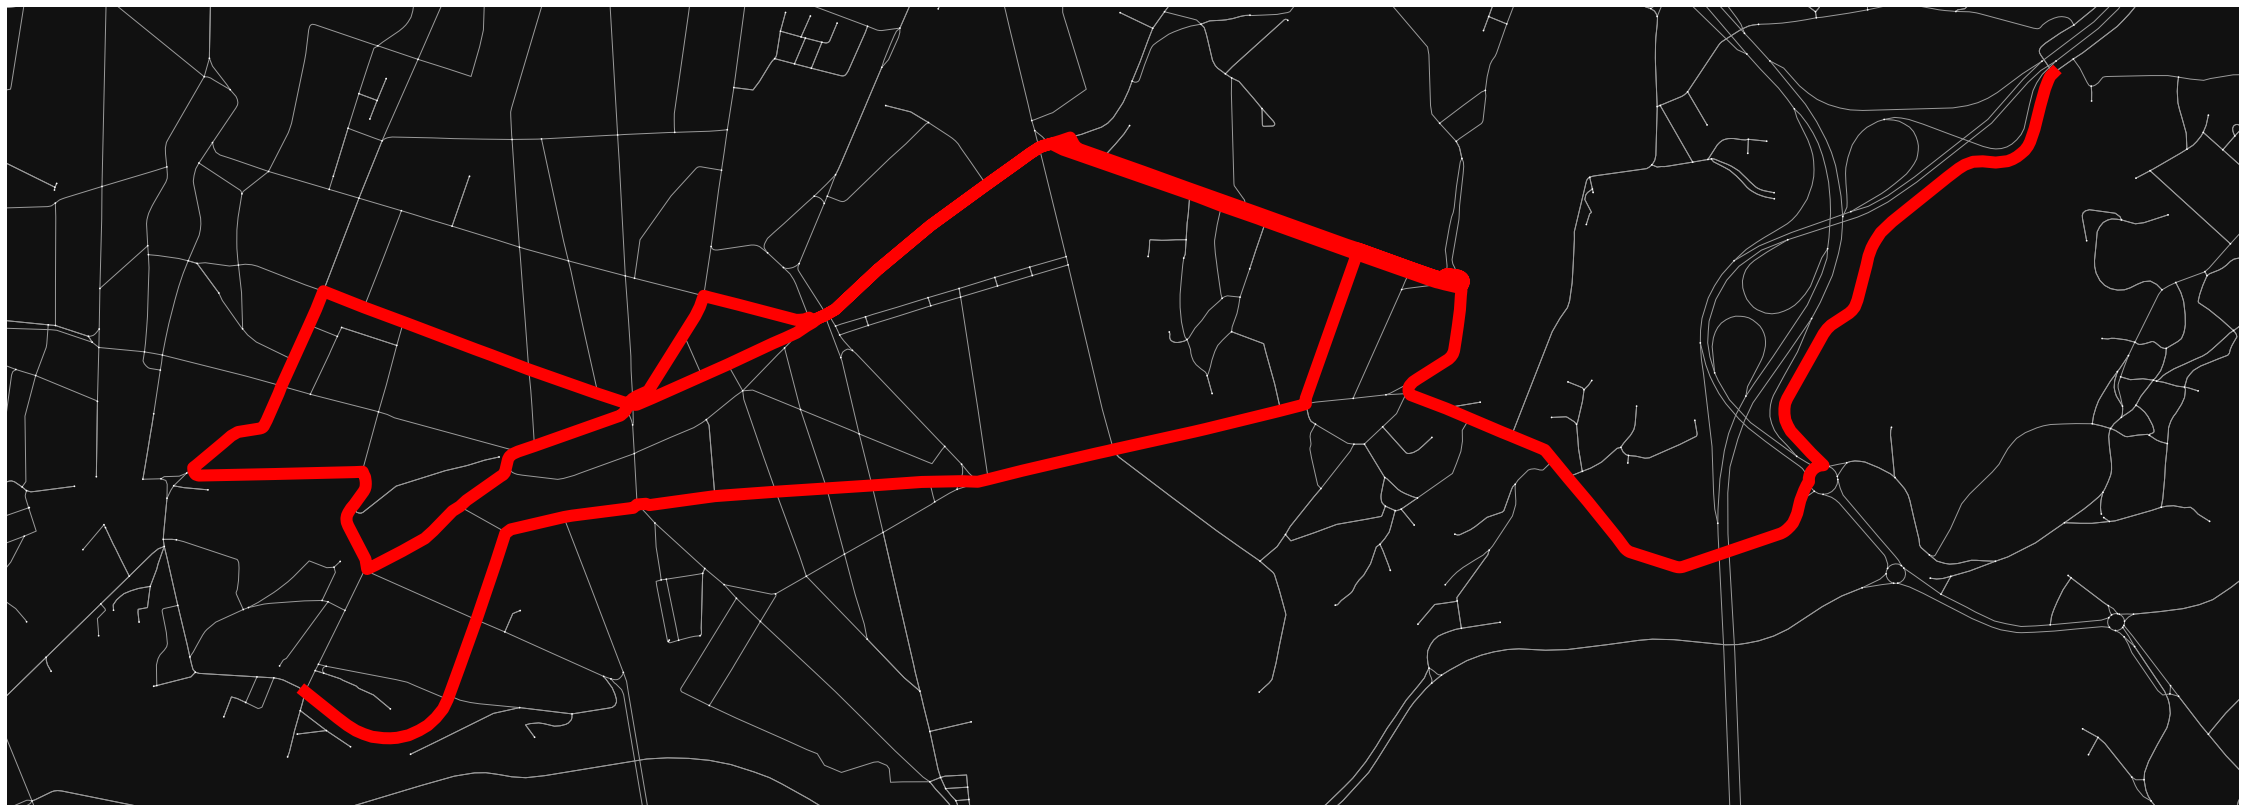

Route Visualization of Trip 4 is completed.


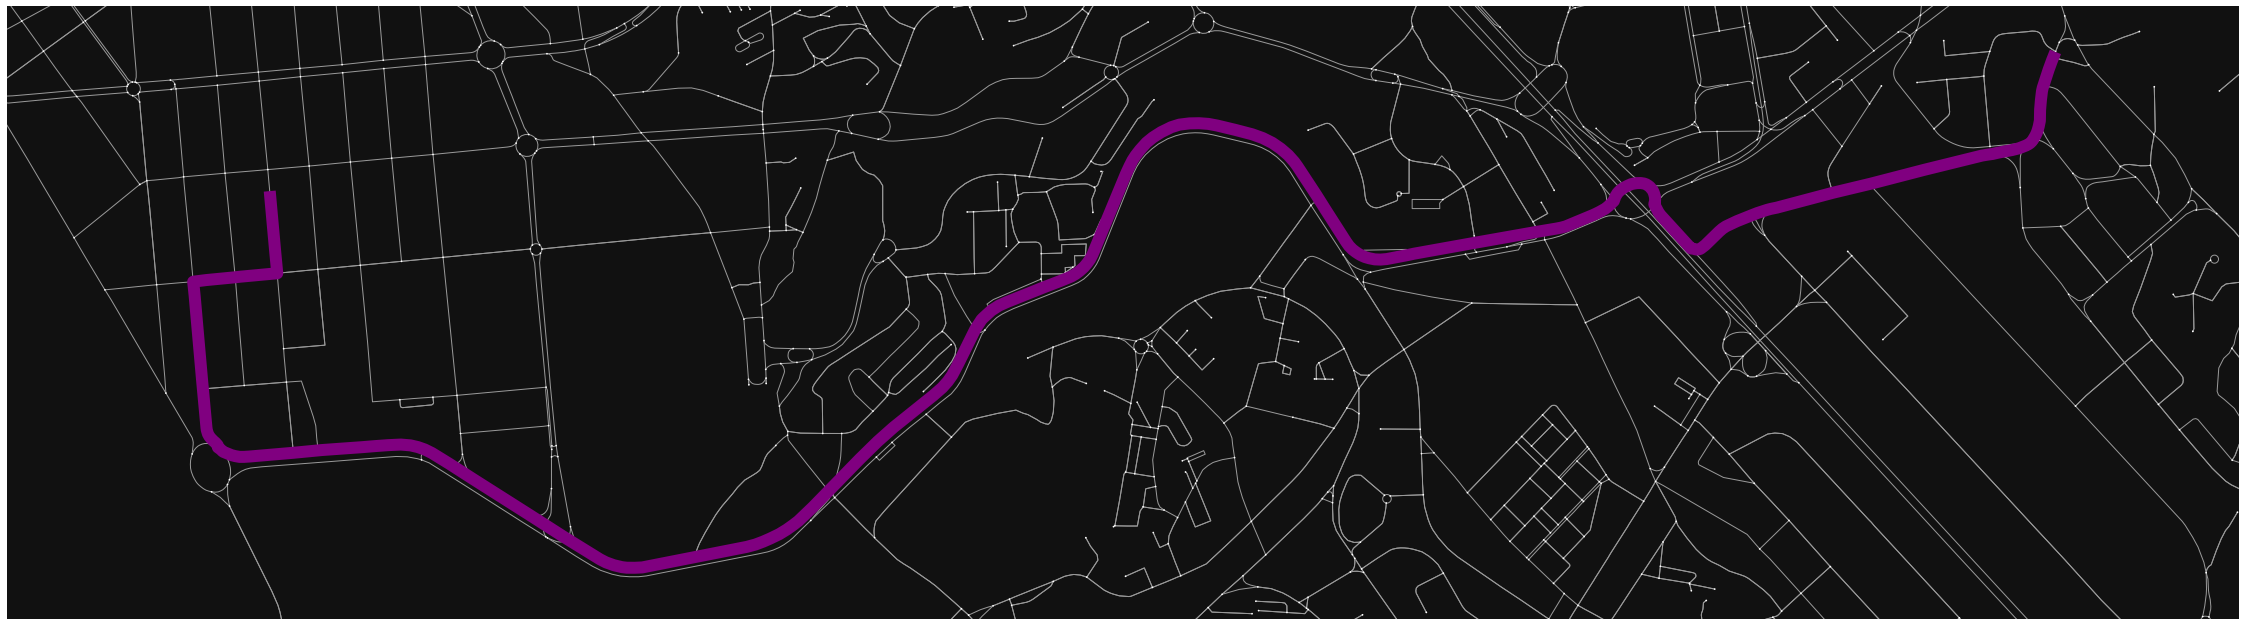

Route Visualization of Trip 5 is completed.


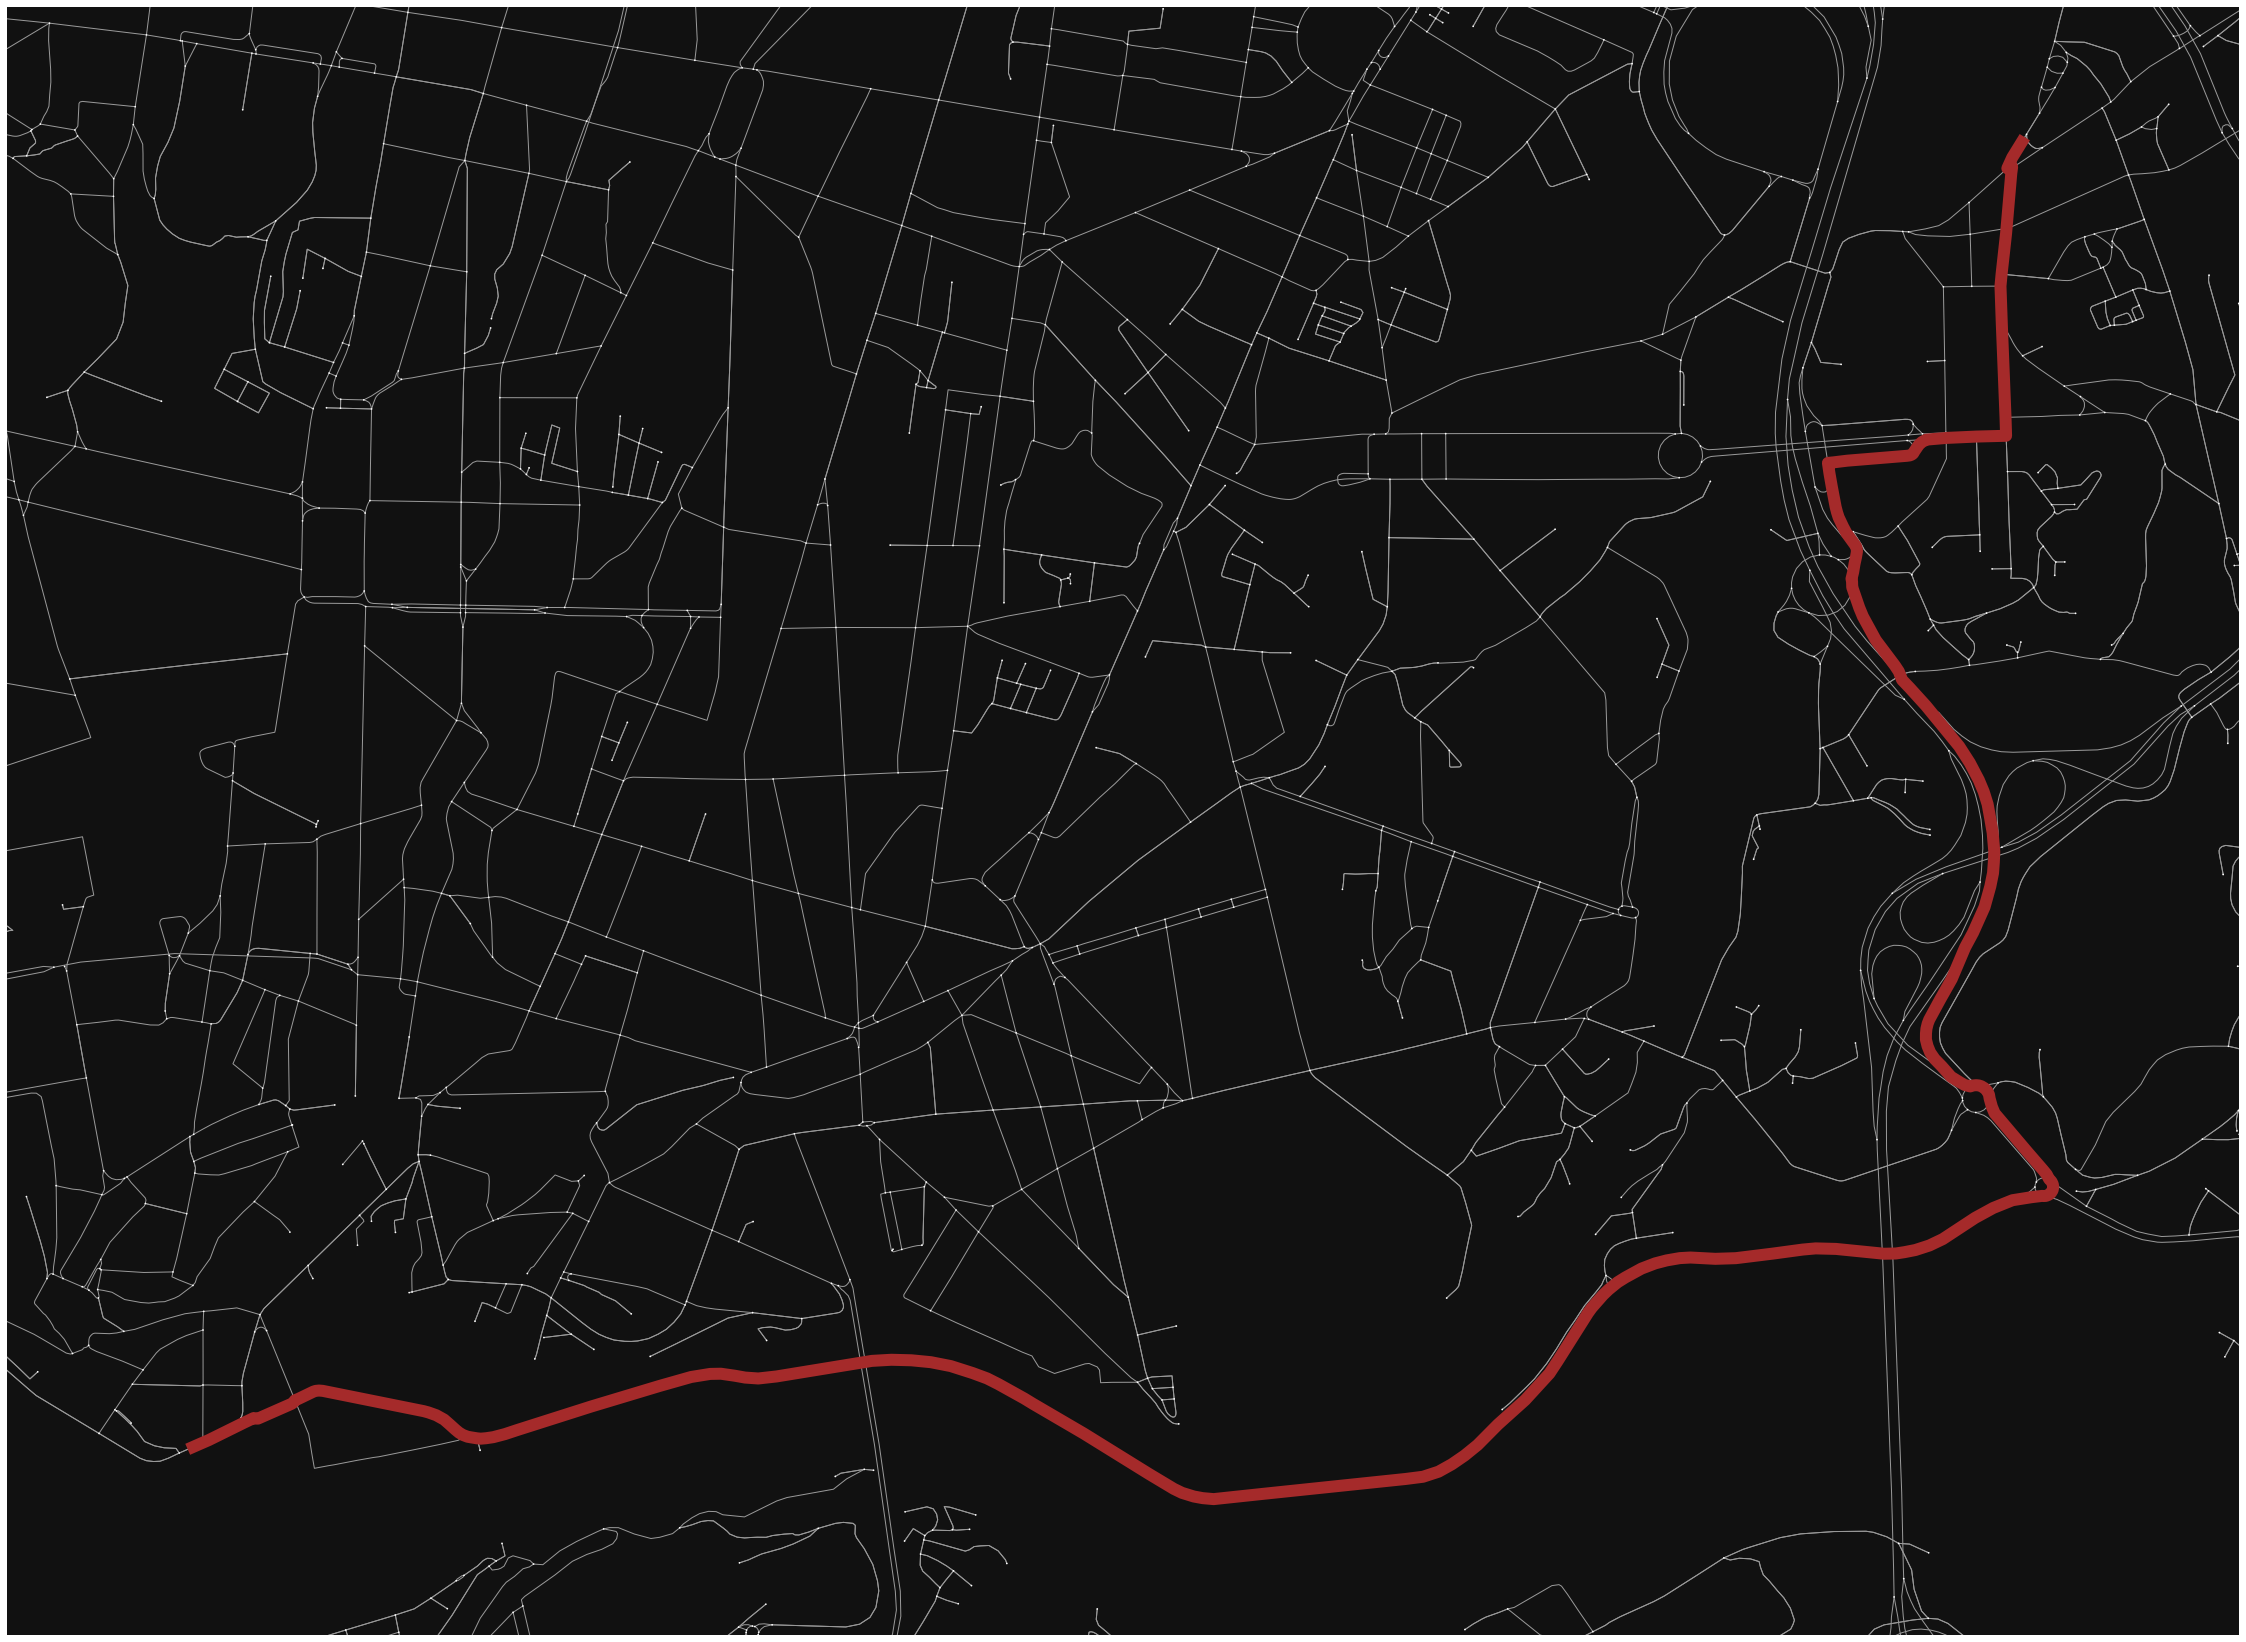

Route Visualization of Trip 6 is completed.


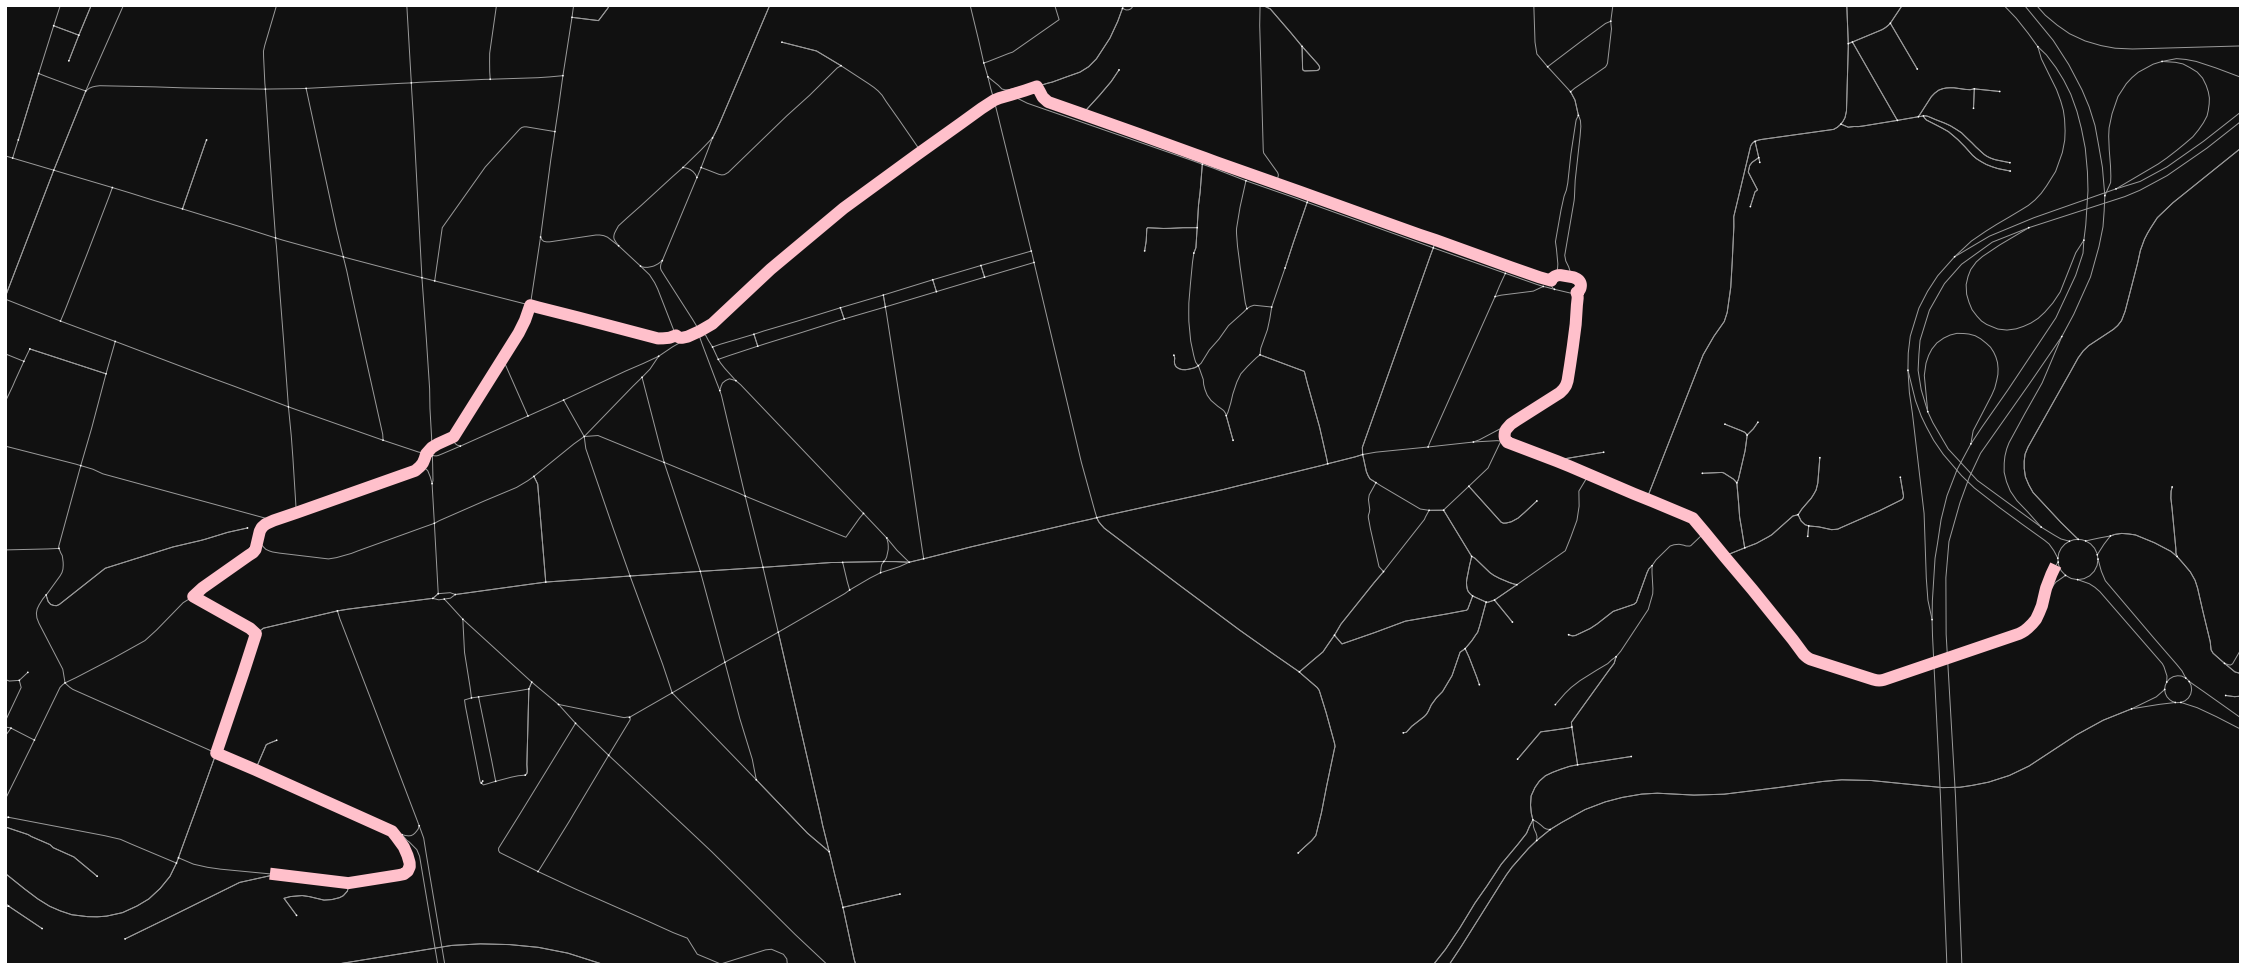

Route Visualization of Trip 7 is completed.


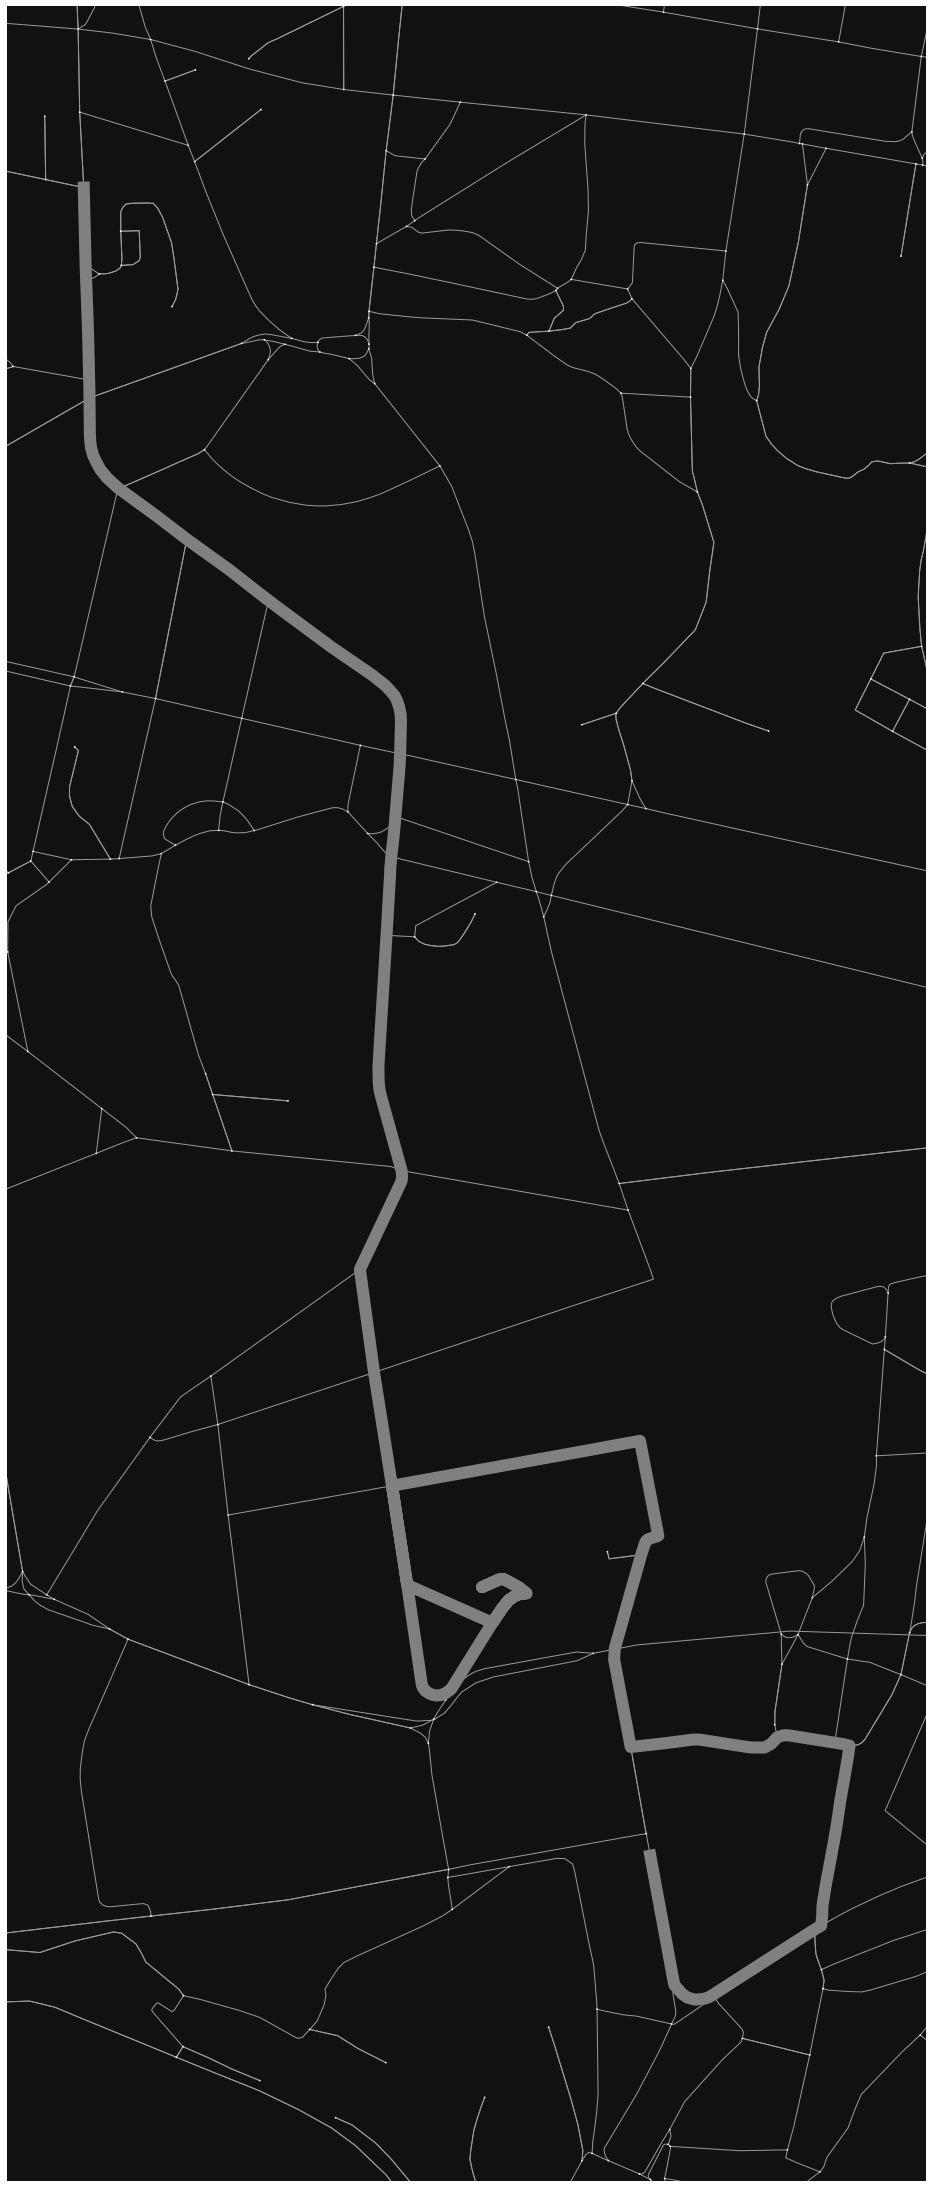

Route Visualization of Trip 8 is completed.


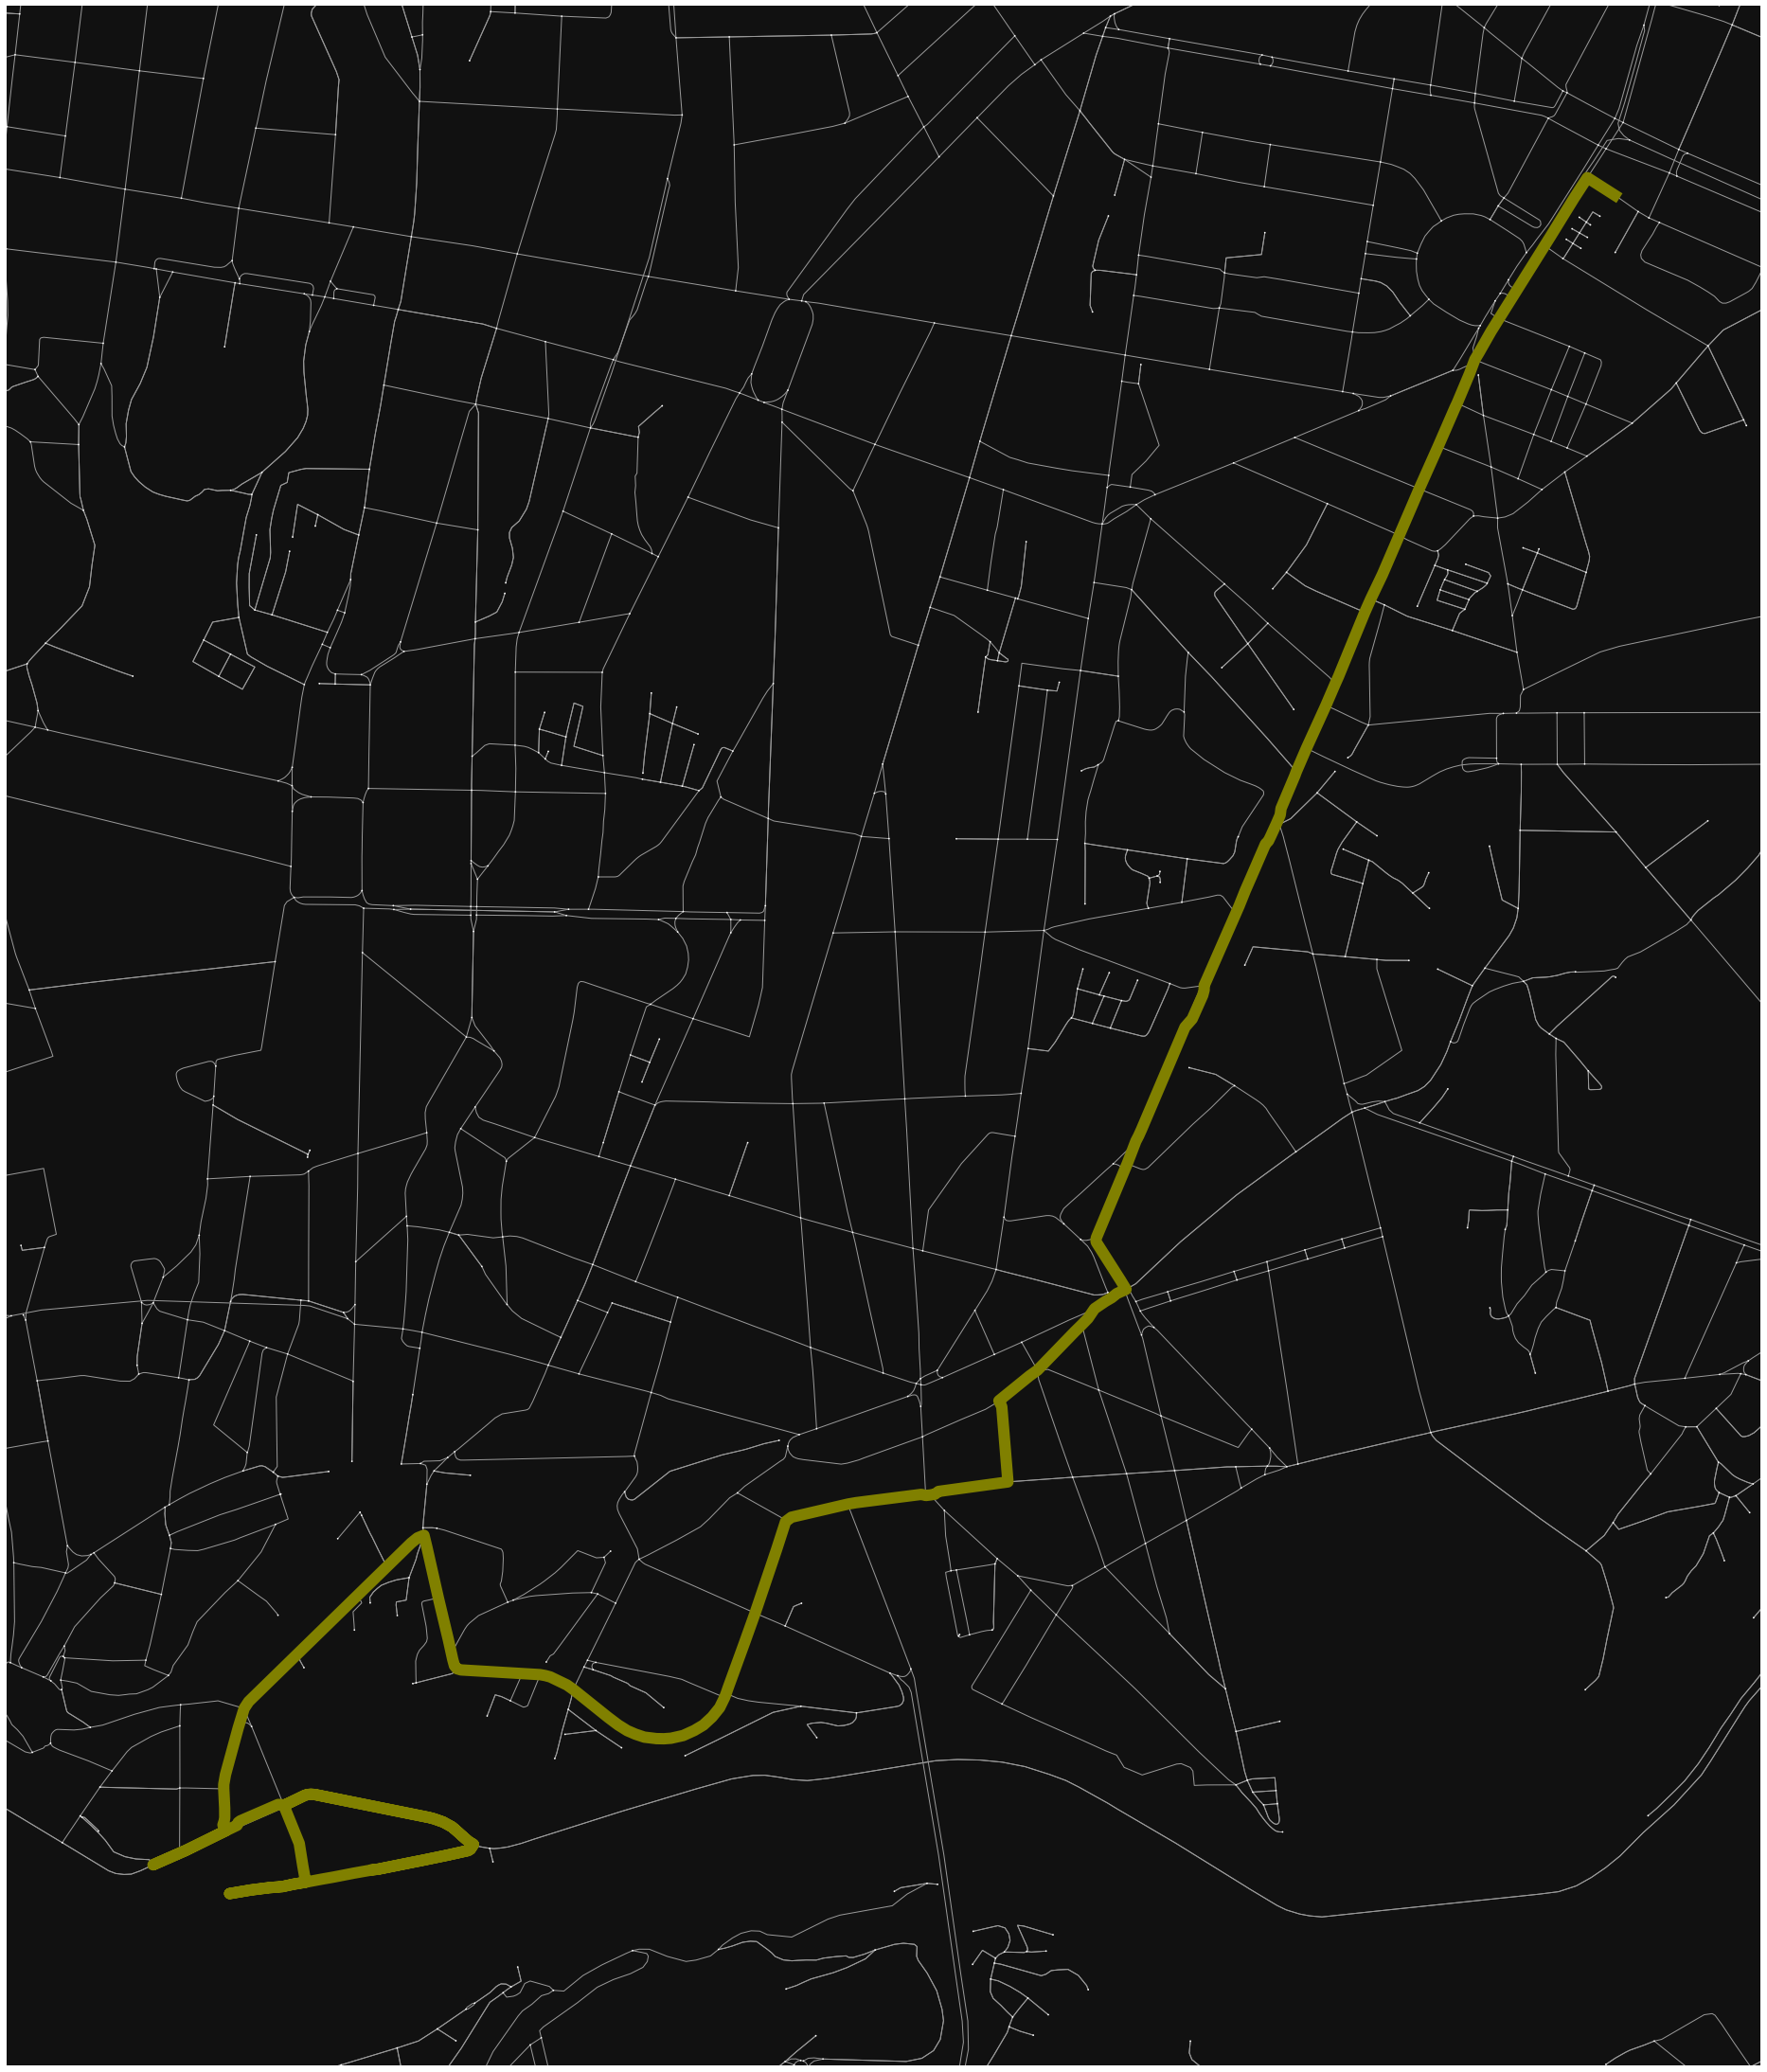

Route Visualization of Trip 9 is completed.


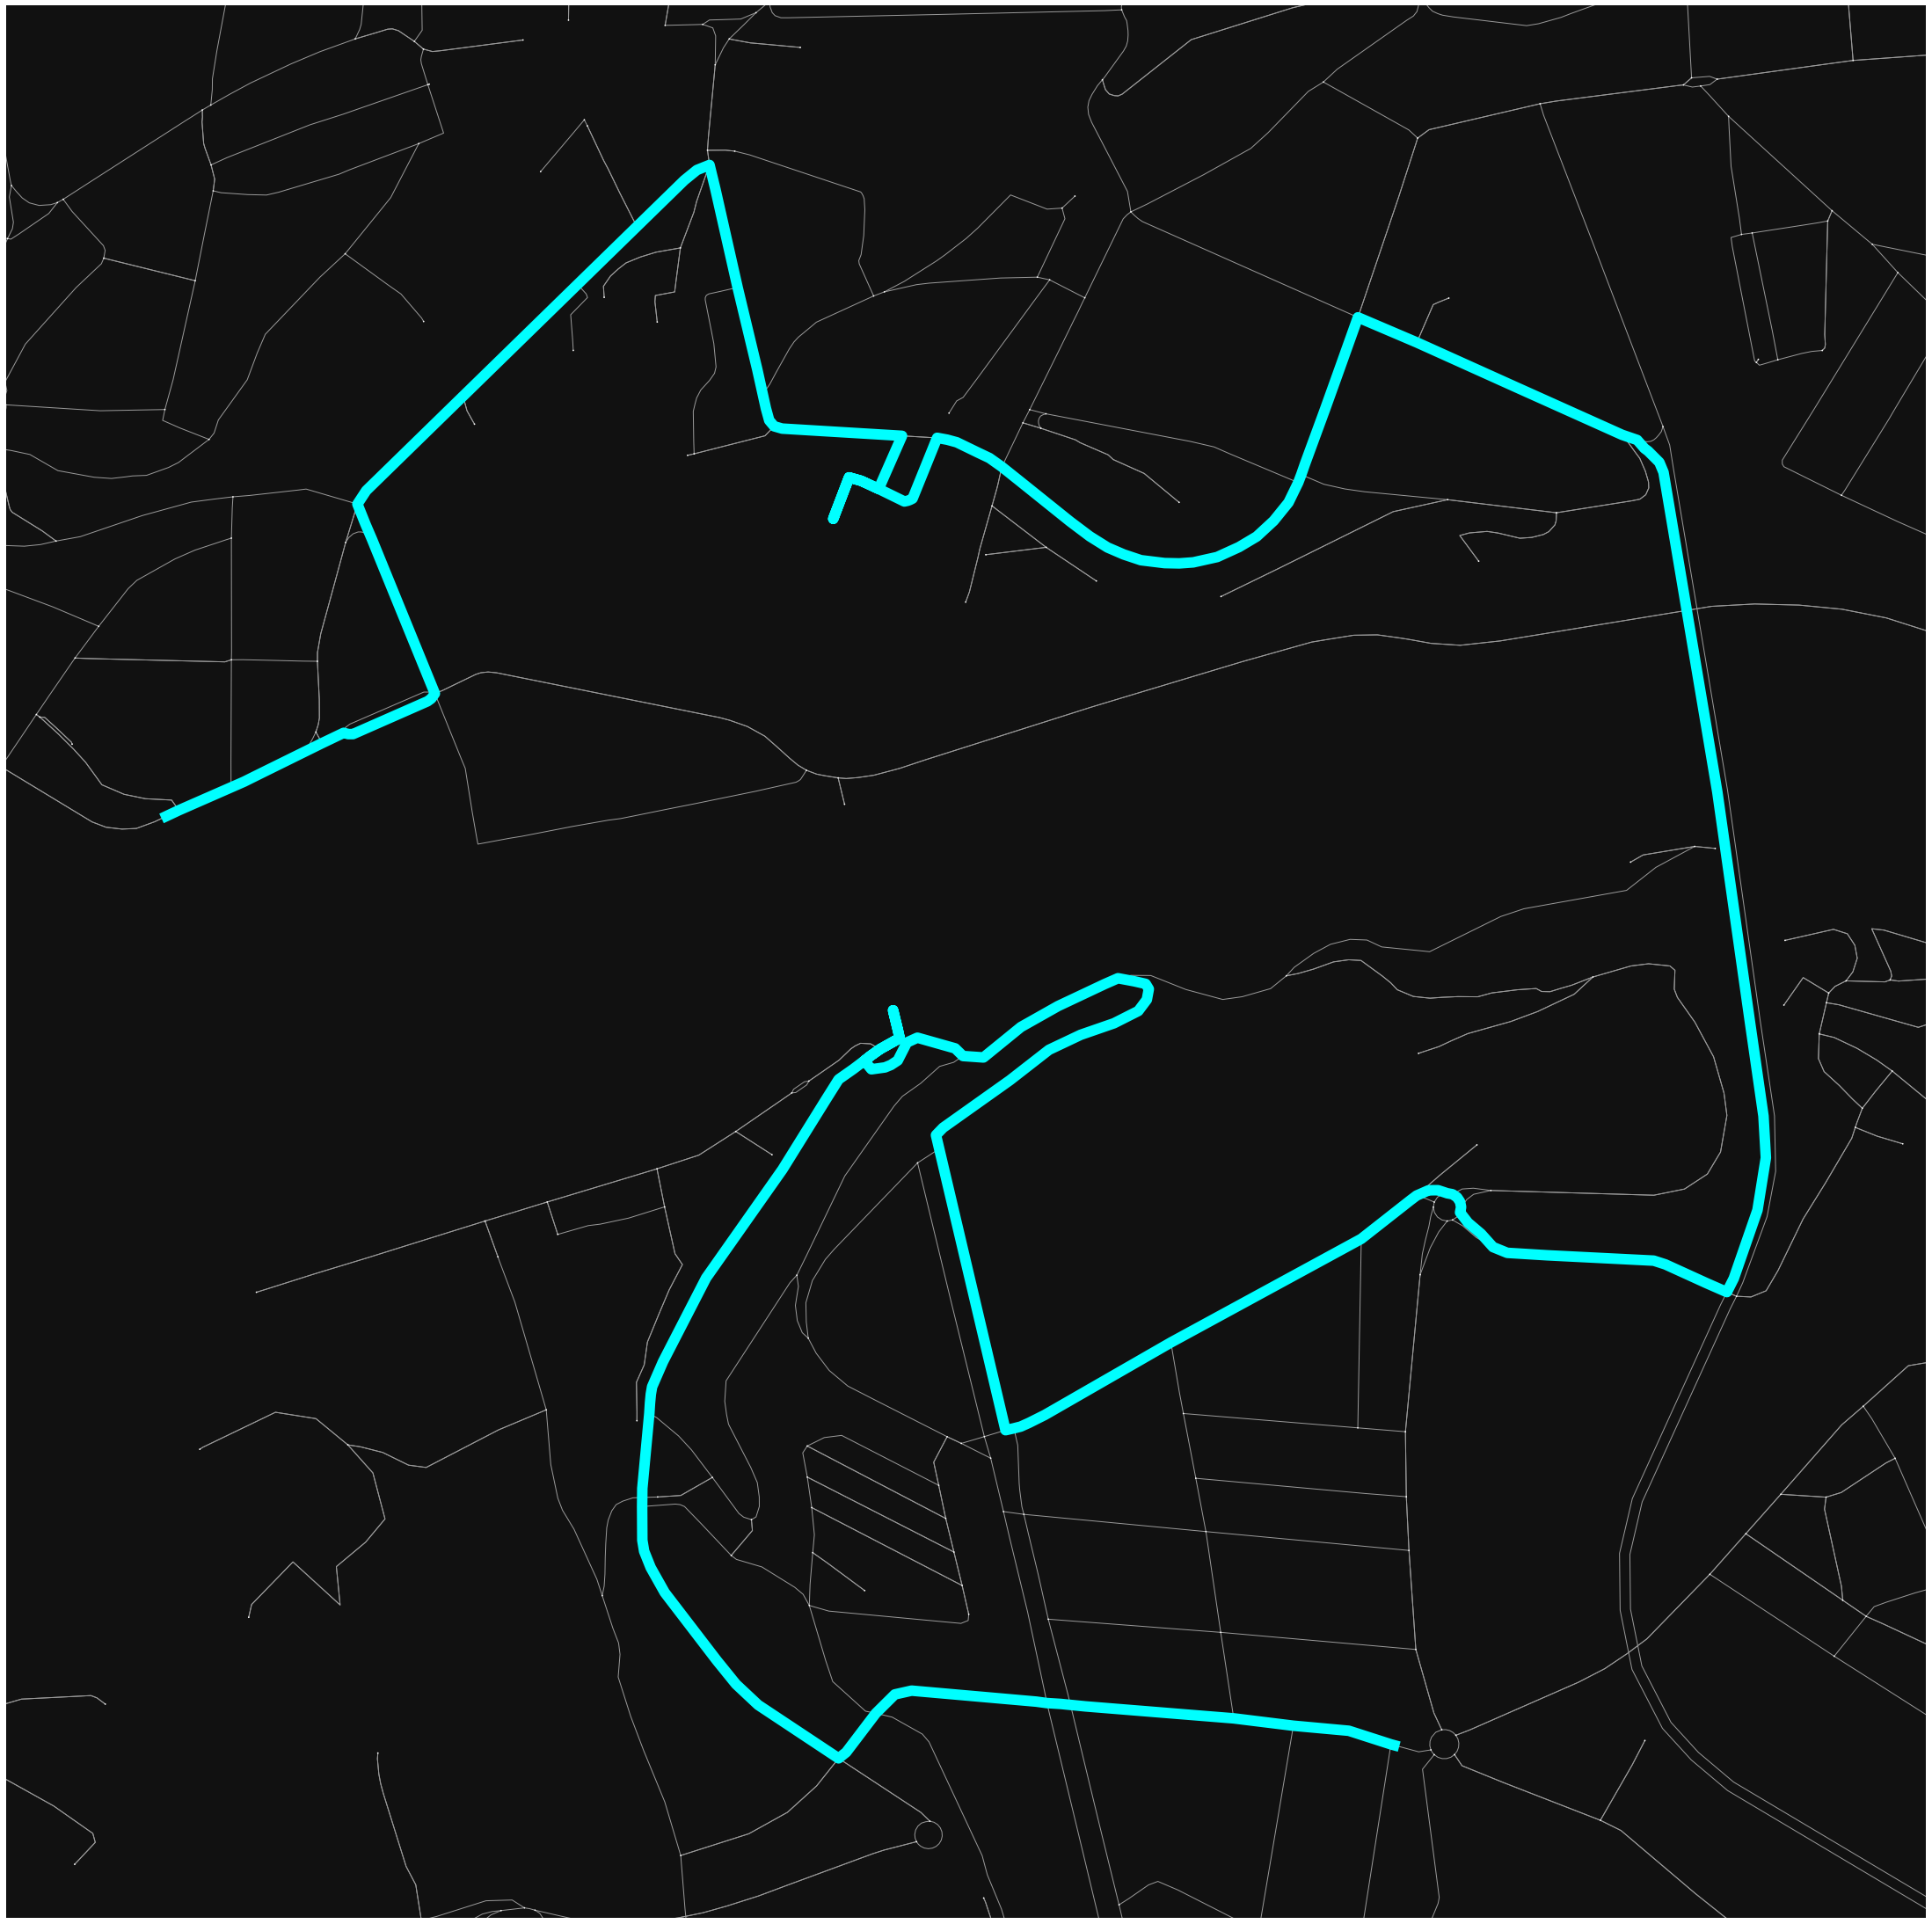

Route Visualization of Trip 10 is completed.


In [55]:
color_list = enumerate(('blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan'), start=0)
for trip_number, color in color_list:
    vis_single_route(trip_number,color,network_graph,save_path=f'../result/task4/Route{trip_number+1}.png')